In [1]:
"""
En este paso, levantamos el nuevo dataset y convertimos al tipo de dato category las columnas que consideramos categoricas
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm

In [2]:
df = pd.read_csv('datasets/df_final.csv', na_values=['nc'], low_memory=False)
ponderadores = pd.read_csv('datasets/df_ponderadores.csv', na_values=['nc'], low_memory=False)
poderador_matematica = ponderadores.ponderador_matematica
df = df.drop('Unnamed: 0', axis=1)
for i in df.columns:
    if (df[i].dtype == object) or i in ['nivel_id', 'escuela_id', 'provincia_id','departamento_id']:
        df[i] = pd.Categorical(df[i])
df.head()

,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,tiene_notebook,tiene_pc,tiene_tablet,tiene_celular,tiene_smartphone,tiene_consola,...,inicial+primaria,privada,secundaria,sin_discriminar,snu,bienes_y_servicios_no_personales,erogacion_de_capital,personal,transferencias_educacion_privada,transferencias_otras
0,f,medio,0,avanzado,no,si,si,si,no,no,...,14153.324289,6424.569041,9509.173296,5318.844228,2564.942087,3060.587468,1537.060193,25583.003705,6424.569041,1365.632533
1,f,alto,0,avanzado,si,si,no,si,no,si,...,14153.324289,6424.569041,9509.173296,5318.844228,2564.942087,3060.587468,1537.060193,25583.003705,6424.569041,1365.632533
2,m,medio,0,satisfactorio,si,si,si,si,no,no,...,14153.324289,6424.569041,9509.173296,5318.844228,2564.942087,3060.587468,1537.060193,25583.003705,6424.569041,1365.632533
3,m,medio,0,avanzado,no,si,no,si,no,si,...,14153.324289,6424.569041,9509.173296,5318.844228,2564.942087,3060.587468,1537.060193,25583.003705,6424.569041,1365.632533
4,m,medio,0,avanzado,si,si,si,no,no,no,...,14153.324289,6424.569041,9509.173296,5318.844228,2564.942087,3060.587468,1537.060193,25583.003705,6424.569041,1365.632533


In [3]:
df.nivel_desemp_matematica.value_counts(normalize=True)

0    0.614062
1    0.385938
Name: nivel_desemp_matematica, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277573 entries, 0 to 277572
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   sexo                              277573 non-null  category
 1   indice_socioeconomico             277573 non-null  category
 2   nivel_desemp_matematica           277573 non-null  int64   
 3   nivel_desemp_lengua               277573 non-null  category
 4   tiene_notebook                    277573 non-null  category
 5   tiene_pc                          277573 non-null  category
 6   tiene_tablet                      277573 non-null  category
 7   tiene_celular                     277573 non-null  category
 8   tiene_smartphone                  277573 non-null  category
 9   tiene_consola                     277573 non-null  category
 10  tiene_smarttv                     277573 non-null  category
 11  tiene_cable                       27757

In [5]:
# ---------------------
# para ver los nulos
def pct_nulos(data):
  return data.isnull().sum() / data.shape[0]
pct_nulos(df)

sexo                                0.0
indice_socioeconomico               0.0
nivel_desemp_matematica             0.0
nivel_desemp_lengua                 0.0
tiene_notebook                      0.0
tiene_pc                            0.0
tiene_tablet                        0.0
tiene_celular                       0.0
tiene_smartphone                    0.0
tiene_consola                       0.0
tiene_smarttv                       0.0
tiene_cable                         0.0
tiene_internet_x                    0.0
repeticion_primaria                 0.0
escuela_id                          0.0
ambito                              0.0
gestion                             0.0
icse                                0.0
indice_socioeconomico_medio         0.0
indice_socioeconomico_medio_cat     0.0
tecnica                             0.0
tiene_internet_y                    0.0
subvencion                          0.0
dependencia                         0.0
departamento_id                     0.0


In [6]:

"""A continuación ejecutamos modelos de regresión logistica para validar que el dataset final sea adecuado para trabajar .
"""
# ---------------------------------------------------
# elimino algunos nulos que quedaros 
df.dropna(inplace=True)
# ------------------------------------------
X = df.drop(columns=['nivel_desemp_matematica', 'escuela_id', 'ambito', 'icse',
       'indice_socioeconomico_medio_cat', 'tecnica',
       'subvencion', 'dependencia', 'director_secundaria', 'profesor_secundaria_15hs',
       'profesor_snu', 'inicial+primaria', 'privada', 'secundaria',
       'sin_discriminar', 'snu', 'bienes_y_servicios_no_personales',
       'erogacion_de_capital', 'personal', 'transferencias_educacion_privada',
       'transferencias_otras'])
y = df['nivel_desemp_matematica']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)


In [7]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns = 'n'):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            #c para tomar columnas categoricas, cualquier otro valor para tomar continuas.
            if self.columns == 'c':
              # --------------------------------------------------
              # este codigo: pd.api.types.is_categorical_dtype(df[col])
              # Cambio en la ultima parte lo que era igual a df[col] por X[col]
              # Da el mismo resultado, pero ahora si le paso otro data frame no me va tirar error
              #  Tambien, lo cambio en el else
              # ----------------------------------------------------
                categorical_columns = [col for col in X.columns if pd.api.types.is_categorical_dtype(X[col])]
                return pd.DataFrame(X[categorical_columns])
            else:
                scal_columns = [col for col in X.columns if (pd.api.types.is_categorical_dtype(X[col]) == False)]
                return pd.DataFrame(X[scal_columns])
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
    def fit(self, X, *_):
        return self
cat_pipe = make_pipeline(ColumnSelector('c'),OneHotEncoder(handle_unknown='ignore'))
num_pipe = make_pipeline(ColumnSelector('n'),StandardScaler())
union = make_union(num_pipe,
                   cat_pipe)



In [ ]:
#Este paso tarda bastante dado que ejecutamos un random grid search.
"""
RESULTADO: 
Best score: 0.739
Best parameters set:
	 log__C: 0.1
	 log__penalty: 'l2'
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     44028
           1       0.69      0.63      0.66     29395

    accuracy                           0.74     73423
   macro avg       0.73      0.72      0.72     73423
weighted avg       0.73      0.74      0.74     73423

0.7373302643585797
"""
# ---------------------------------
# Con los cambios que hice este fue el score
# Best score: 0.772
# Best parameters set:
# 	 log__C: 0.1
# 	 log__penalty: 'l2'
# 	 log__solver: 'saga'
#               precision    recall  f1-score   support

#            0       0.84      0.89      0.86       966
#            1       0.69      0.58      0.63       400

#     accuracy                           0.80      1366
#    macro avg       0.76      0.74      0.75      1366
# weighted avg       0.79      0.80      0.80      1366

# 0.801610541727672


#  el solver elegido saga, segun la documentación de sklearn funciona mejor para dasets grandes como el nuestro
# ---------------------------------------------------

# -------------------------------------------------------
# para que la regresion logistica sea representativa de una poblacion se tienen que usar los ponderadores
# LogisticRegression(solver='liblinear').fit(X,y,class_weight=ponderador_matematica)
#  hay que ver como se lo agregamos al grid search ya que no me deja hacerlo 
# -----------------------------------------------------------



pipeline = Pipeline([('union', union), 
                     ('log', LogisticRegression(solver='liblinear'))])
# ----------------------------------------------
#  agrego solver para elegir 
parameters = {'log__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'log__penalty': ['l1', 'l2','elasticnet','none'],
              'log__C': [0.01, 0.1, 1, 10, 100],
              'log__fit_intercept':[False,True]
              }
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
grid_search = RandomizedSearchCV(pipeline, parameters,cv=folds, n_jobs = 5)
grid_search.fit(pd.DataFrame(X_train, columns=X.columns), y_train)

print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 
# -----------------------------------------------------------------------------
# habria que evitar usar los datos de testeo, primero probar con varios modelos, una vez elegido el modelo usar los datos de testeo
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [8]:
#   Agrego el sample_Weight para usar los ponderadores
pipeline = Pipeline([('union', union), 
                    ('log', LogisticRegression(solver='saga',penalty='l2',C=0.21,fit_intercept=True))])
lr = pipeline.fit(pd.DataFrame(X_train, columns=X.columns), y_train,**{'log__sample_weight': poderador_matematica.loc[X_train.index]})

y_pred_train = lr.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79    127835
           1       0.67      0.60      0.64     80344

    accuracy                           0.73    208179
   macro avg       0.72      0.71      0.71    208179
weighted avg       0.73      0.73      0.73    208179

0.7326051138683537


Text(33,0.5,'verdaderos')

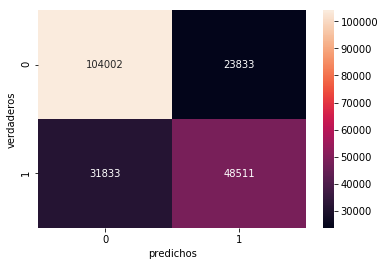

In [13]:
matriz = confusion_matrix(y_train,y_pred_train)
sns.heatmap(matriz,annot=True,fmt="d")
plt.xlabel("predichos")
plt.ylabel("verdaderos")

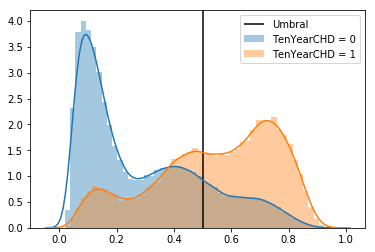

In [14]:
# Histograma de probabilidades para ver si cambiando el umbral de decición puedo mejorar el accuracy 
sns.distplot(lr.predict_proba(X_train[y_train==0])[:,1])
sns.distplot(lr.predict_proba(X_train[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'TenYearCHD = 0', 'TenYearCHD = 1'])

In [16]:
accuracy = []
for umbral in np.linspace(0.01,0.7,40):
  probabilidad = lr.predict_proba(X_train)[:,1]
  y_pred_proba = probabilidad > umbral
  accuracy.append([accuracy_score(y_train,y_pred_proba),umbral])
  # print(f"umbral igual {umbral}:",accuracy_score(y_train,y_pred_proba))
print("mejor accuracy es",max(accuracy))
# Hay que tener en cuenta que al hacer esto podemos tener problemas de overfitting, 
# si lo hicieramos en un esquema de validacion cruzada seria mejor

mejor accuracy es [0.7324706142310223, 0.5053846153846153]


In [10]:
# -----------------------------------------------
#  Ahora pruebo con un modelo naive bayes, como el union devuelve una matriz esparza primero lo aplico por fuera
#  y luego hago el grid search lo paso como array y busco entre dos modelo de tipo naive bayes 
#  Para este grid search tuve que reducir las columnas del data frame porque sino se hace imposible de correr por el tamaño
# ---------------------------------------
X_naive_bayes = df.drop(columns=['nivel_desemp_matematica', 'escuela_id', 'ambito', 'icse',
       'indice_socioeconomico_medio_cat', 'tecnica',
       'subvencion', 'dependencia', 'director_secundaria', 'profesor_secundaria_15hs',
       'profesor_snu', 'inicial+primaria', 'privada', 'secundaria',
       'sin_discriminar', 'snu', 'bienes_y_servicios_no_personales',
       'erogacion_de_capital', 'personal', 'transferencias_educacion_privada',
       'transferencias_otras'])

X_train_naive, X_test_naive, y_train, y_test = train_test_split(X_naive_bayes, y, stratify = y, random_state=42)


X_train_union= union.fit_transform(X_train_naive)
X_test_union= union.transform(X_test_naive)

pipeline = Pipeline([('modelo', GaussianNB())])

parameters = {'modelo':[GaussianNB(),LinearDiscriminantAnalysis()]}

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_search_GNB_LDA = GridSearchCV(pipeline, parameters,cv=folds)
grid_search_GNB_LDA.fit(X_train_union.toarray(), y_train)

print("Best score: %0.3f" % grid_search_GNB_LDA.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search_GNB_LDA.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name]))
y_pred = grid_search_GNB_LDA.best_estimator_.predict(X_train_union.toarray())
print("EN ENTRENAMIENTO: \n",classification_report(y_train, y_pred))
print("EN ENTRENAMIENTO",accuracy_score(y_train, y_pred))
resultados_NB = pd.DataFrame(grid_search_GNB_LDA.cv_results_)
#  Se ve el algoritmo linear discriminant analysis anda bien.
#  Aqui la documentación https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

Best score: 0.731
Best parameters set:
	 modelo: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
EN ENTRENAMIENTO: 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79    127835
           1       0.67      0.59      0.63     80344

    accuracy                           0.73    208179
   macro avg       0.72      0.71      0.71    208179
weighted avg       0.73      0.73      0.73    208179

EN ENTRENAMIENTO 0.732134365137694


In [61]:
resultados_NB.iloc[:,4:]

,param_modelo,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,"GaussianNB(priors=None, var_smoothing=1e-09)","{'modelo': GaussianNB(priors=None, var_smoothi...",0.687098,0.688323,0.688419,0.688611,0.690020,0.688494,0.000930,2
1,"LinearDiscriminantAnalysis(n_components=None, ...",{'modelo': LinearDiscriminantAnalysis(n_compon...,0.729153,0.729081,0.729609,0.729609,0.733397,0.730170,0.001629,1


In [25]:
# Corro el gaussian para ver los scores

gaussian = GaussianNB()
gaussian.fit(X_train_union.toarray(), y_train,sample_weight = poderador_matematica.loc[X_train_naive.index])
# pipeline.fit(X_train_union.toarray(), y_train,**{'log__sample_weight': poderador_matematica.loc[X_train.index]})

y_pred_train_gaussian = gaussian.predict(X_train_union.toarray())
print(classification_report(y_train, y_pred_train_gaussian))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69    127835
           1       0.52      0.57      0.55     80344

    accuracy                           0.63    208179
   macro avg       0.62      0.62      0.62    208179
weighted avg       0.64      0.63      0.64    208179



### Comentarios
Era de esperase que el modelo gaussian_NB sean malo, ya que supone que las features no se correlacionan, cosa que es muy poco problable. Ya que un chico que se encuentra en una clase economicamente baja es de esperarse que no tenga celular, computadora y varios elementos mas que aparecen como variables dummy.
Por otra parte el algoritmo LinearDiscriminant Analysis funciona muy bien, llegando a resultados parecidos al de la regresión logistica en entrenamiento.


## Graficos

Primero vemos el balance de las clases que tenemos en el data frame

Text(0.5,1,'Desempeño en Matemática')

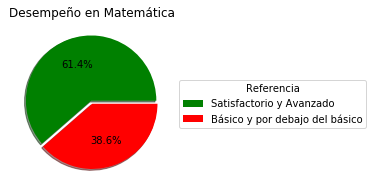

In [9]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
porcentaje = df.nivel_desemp_matematica.value_counts()
ax.pie(porcentaje,autopct='%1.1f%%',explode=(0.05,0),shadow=True,colors=["Green","Red"])
ax.legend(("Satisfactorio y Avanzado","Básico y por debajo del básico"),
          title="Referencia",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Desempeño en Matemática")

Tenemos un 61.4% de gente que aprobo y un 38.6% de gente que desaprobo

Text(0.5,1,'Gestión')

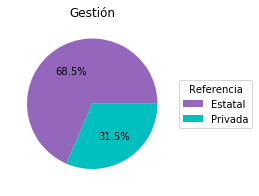

In [10]:
df_gestion = df[df.gestion != "social/cooperativa"].copy()
df_gestion["gestion"] = df_gestion.gestion.astype(object)
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

porcentaje_gestion = df_gestion.gestion.value_counts()
ax.pie(porcentaje_gestion,autopct='%1.1f%%',colors=["C4","c"])
ax.legend(("Estatal","Privada","Social"),
          title="Referencia",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Gestión")

Tenemos un total de 68.5% de alumnos que van a escuelas estatales en la muestra y un 31.5% de alumnos que van a una escuela privada.<br>
Hay que destacar que se eliminaron 95 alumnos que asisten a escuelas social o cooperativa

Text(0.5,1,'Desempeño en matemática y gestion escolar')

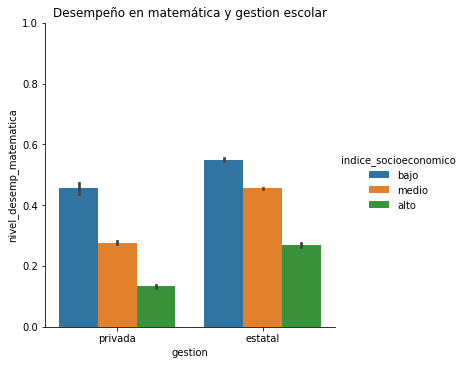

In [15]:
grafico_gestion = sns.catplot(x="gestion", y="nivel_desemp_matematica",hue="indice_socioeconomico",hue_order=["bajo","medio","alto"], kind="bar", data=df_gestion)
plt.ylim((0,1))
plt.title("Desempeño en matemática y gestion escolar")

In [9]:
# Para ver los valores del grafico
df.groupby(["gestion","indice_socioeconomico"])["nivel_desemp_matematica"].mean()

gestion             indice_socioeconomico
estatal             alto                     0.268507
                    bajo                     0.549543
                    medio                    0.455459
privada             alto                     0.132829
                    bajo                     0.456364
                    medio                    0.276874
social/cooperativa  alto                     1.000000
                    bajo                     0.684211
                    medio                    0.763889
Name: nivel_desemp_matematica, dtype: float64

En este grafico se aprecia que al mismo nivel economico, si un alumno pertenece a una escuela publica tiene mas chances de desaprobar

Para ver si los que se desempeñan bien en lengua lo hacen igual en matematica se realiza el siguente grafico:

Text(0.5,1,'Desempeño en matemática vs desempeño en lengua')

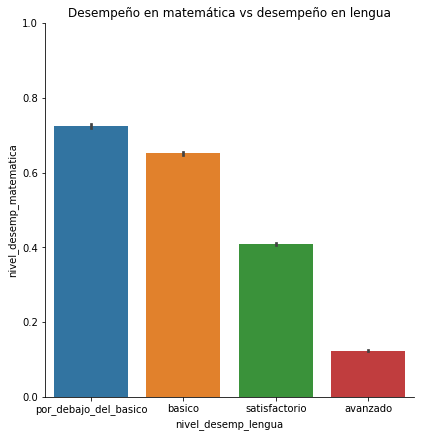

In [12]:
sns.catplot(x="nivel_desemp_lengua", y="nivel_desemp_matematica", kind="bar",order=["por_debajo_del_basico","basico","satisfactorio","avanzado"], data=df,height=6);
plt.ylim((0,1))
plt.title("Desempeño en matemática vs desempeño en lengua")

Se observa que el desempeño en lengua esta correlacionado con el desempeño en matematica. Ya que por ejemplo dentro del grupo de alumnos que obtuvieron una calificación igual a basico en lengua, mas del 60% desaprobo matematica. Dentro del grupo que obtuvo un puntaje por debajo del basico en lengua, mas del 70% desaprobo matematica. Por el contrario si su puntaje fue avanzado en lengua, menos del 15% desaprueba matematica. 

In [18]:
# Para ver los valores del grafico
df.groupby("nivel_desemp_lengua")["nivel_desemp_matematica"].mean()

nivel_desemp_lengua
avanzado                 0.123657
basico                   0.651534
por_debajo_del_basico    0.723312
satisfactorio            0.408851
Name: nivel_desemp_matematica, dtype: float64

### Indice socioeconomico
Por ver si hay alguna correlación entre el indice socioeconomico, que va del 1 al 3, y la nota obtenida en matematica se realiza un box plot.

Text(0.5,1,'Nivel socioeconomico promedio y desempeño en matematica')

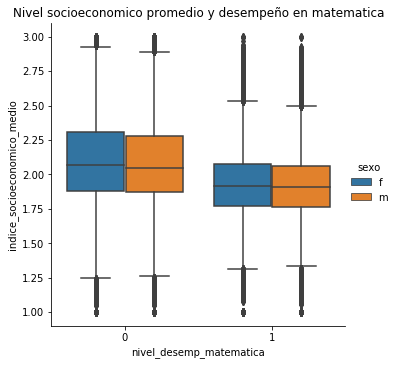

In [13]:
sns.catplot(x="nivel_desemp_matematica", y="indice_socioeconomico_medio", hue="sexo", kind="box", data=df)
plt.title("Nivel socioeconomico promedio y desempeño en matematica")

In [11]:
df.groupby(["sexo","nivel_desemp_matematica"])["indice_socioeconomico_medio"].describe()

count      mean       std  min       25%  \
sexo nivel_desemp_matematica                                               
f    0                        88405.0  2.091609  0.331096  1.0  1.882353   
     1                        58576.0  1.931898  0.262474  1.0  1.770492   
m    0                        82042.0  2.076225  0.331201  1.0  1.871429   
     1                        48550.0  1.919830  0.258532  1.0  1.766667   

                                   50%       75%  max  
sexo nivel_desemp_matematica                           
f    0                        2.066667  2.304348  3.0  
     1                        1.917808  2.075758  3.0  
m    0                        2.047619  2.280488  3.0  
     1                        1.907216  2.060000  3.0

Del siguiente grafico se puede ver lo siguiente. En promedio los alumnos que tienen un nivel socio economico mayor, tienen menos probabilidad de desaprobar.

### Diferencia entre provincias
Para ver si hay una diferencia significativa en el porcentaje de aprobador y desaprobados entre provincias

In [25]:
prov = pd.read_csv("datasets/app_provincia.csv")
df_grafico = pd.merge(df,prov,how="left",left_on="provincia_id",right_on="id",suffixes=("_df","_prov"))

Text(0.5,1,'Desempeño en matemática por provincia')

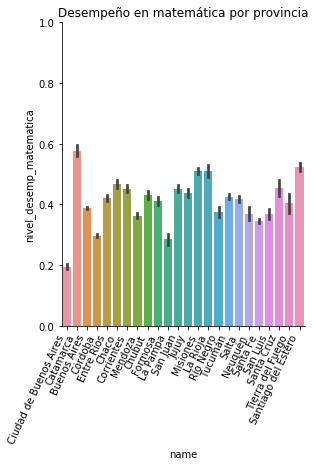

In [29]:
sns.catplot(x="name", y="nivel_desemp_matematica", kind="bar", data=df_grafico);
plt.ylim((0,1))
plt.xticks(rotation=65, horizontalalignment='right')
plt.title("Desempeño en matemática por provincia")

Se aprecia que el porcentaje de aprobados y desaprobados varia mucho entre provincias, esto puede ser por diferentes condiciones economicas que afectan a la educacion

In [42]:
indice_socioeconomico_provincia = df_grafico.groupby("name")["indice_socioeconomico_medio"].mean().sort_values(ascending=False)

Hago el mismo grafico pero ordenando por indice socioeconomico medio de la provincia.<br> Este indice socio economio medio se calcula para cada escuela por lo que se hace un promedio por provincia y ahi se ordena

Text(0.5,1,'Desempeño en matemática por provincia.\n Ordenado por indice socioeconomico medio')

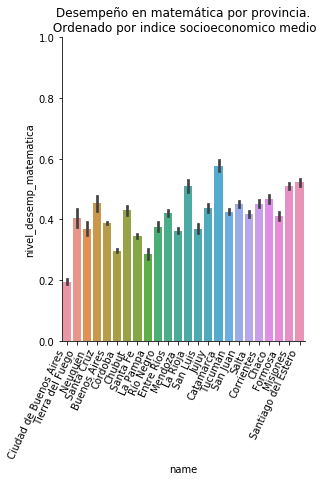

In [38]:
sns.catplot(x="name", y="nivel_desemp_matematica", kind="bar",order=indice_socioeconomico_provincia.index, data=df_grafico)
plt.xticks(rotation=65, horizontalalignment='right')
plt.ylim((0,1))
plt.title("Desempeño en matemática por provincia.\n Ordenado por indice socioeconomico medio")

Mirando el desempeño en matematica teniendo en cuenta el indice economio del alumno que se divide en bajo, medio y alto se observa lo siguiente:

Text(0.5,1,'Desempeño en matemática y índice económico')

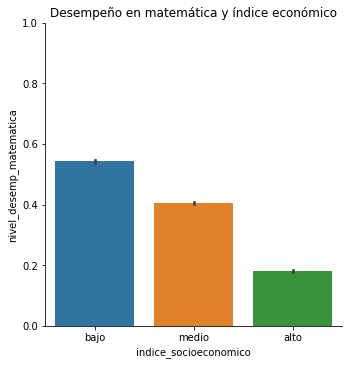

In [17]:
sns.catplot(x="indice_socioeconomico", y="nivel_desemp_matematica",order=["bajo","medio","alto"], kind="bar", data=df);
plt.ylim((0,1))
plt.title("Desempeño en matemática y índice económico")

Se puede ver que los alumnos que tiene un indice socioeconomico bajo, mas de un 50% de ellos no aprueba las pruebas aprender.<br>
Dentro de la clase media un 40% desaprueba y de los de indice alto casi un 20%.

### Matricula y nivel de desempeño

Text(0.5,1,'Desempeño en matemática y cantidad de matriculados por escuela')

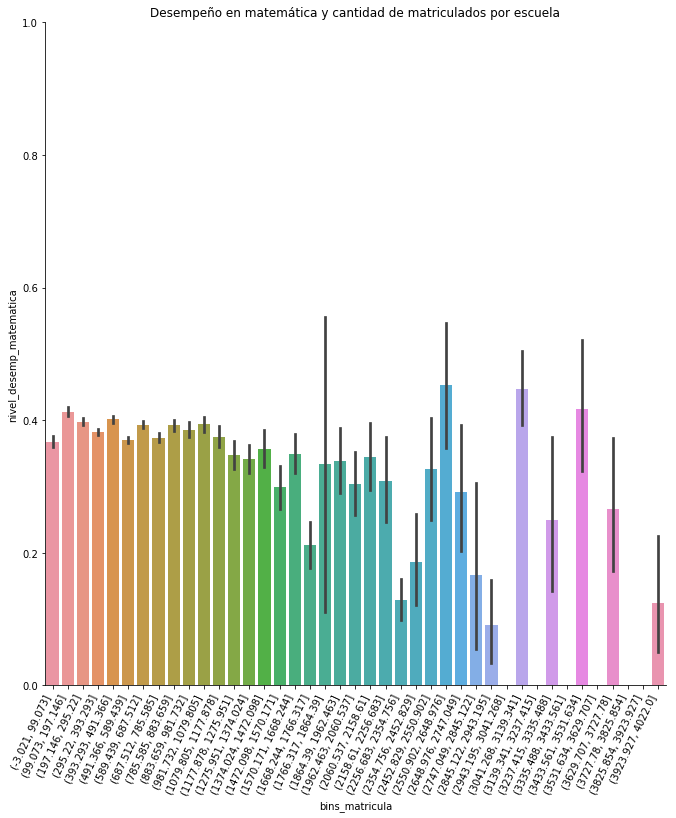

In [40]:
df_grafico["bins_matricula"] = pd.cut(df_grafico.matricula,bins=41)
sns.catplot(x="bins_matricula", y="nivel_desemp_matematica", kind="bar", height=10,data=df_grafico)
plt.xticks(rotation=65, horizontalalignment='right')
plt.ylim((0,1))
plt.title("Desempeño en matemática y cantidad de matriculados por escuela")

In [52]:
indices_bins = df_grafico.groupby("bins_matricula")["indice_socioeconomico_medio"].mean().sort_values(ascending=False)

Text(0.5,1,'Desempeño en matemática y cantidad de matriculados por escuela')

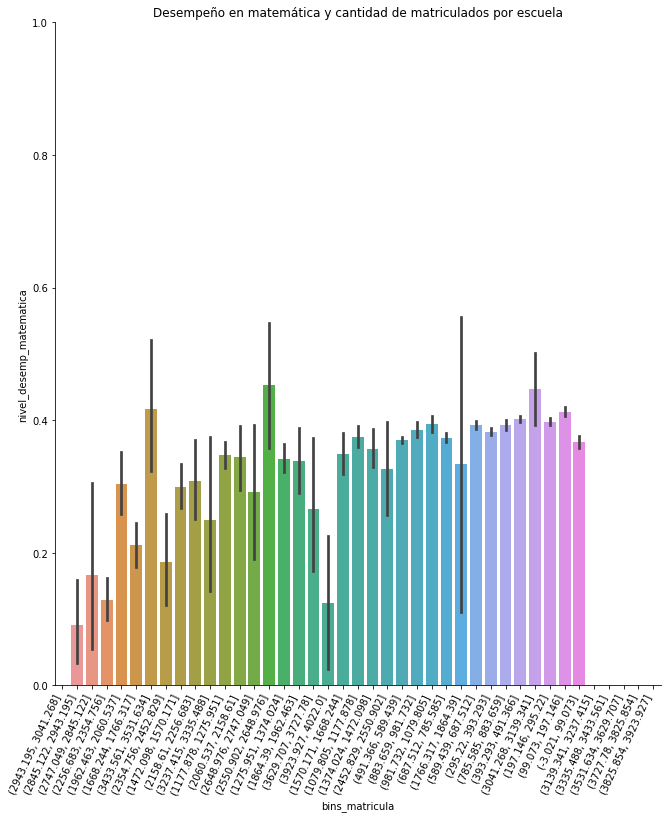

In [53]:
sns.catplot(x="bins_matricula", y="nivel_desemp_matematica",order=indices_bins.index, kind="bar", height=10,data=df_grafico)
plt.xticks(rotation=65, horizontalalignment='right')
plt.ylim((0,1))
plt.title("Desempeño en matemática y cantidad de matriculados por escuela")

In [13]:
bienes = pd.get_dummies(df[['tiene_notebook', 'tiene_pc', 'tiene_tablet', \
       'tiene_celular', 'tiene_smartphone', 'tiene_consola', 'tiene_smarttv', \
       'tiene_cable', 'tiene_internet_x']],drop_first=True)
cantidad_bienes = bienes.sum(axis=1)

Text(0.5,1,'Desempeño en matemática y cantidad de bienes')

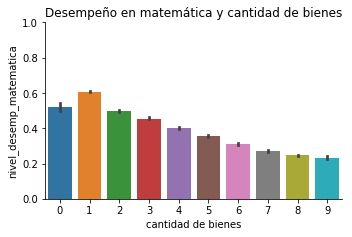

In [14]:
sns.catplot(x=cantidad_bienes, y="nivel_desemp_matematica", kind="bar", data=df)
plt.ylim((0,1))
plt.xlabel("cantidad de bienes")
plt.title("Desempeño en matemática y cantidad de bienes")

In [17]:
# Para ver los valores del grafico
df["bienes"] = cantidad_bienes
df.groupby("bienes")["nivel_desemp_matematica"].mean()

bienes
0    0.521058
1    0.608582
2    0.496834
3    0.455388
4    0.402621
5    0.355341
6    0.311035
7    0.270363
8    0.246271
9    0.232992
Name: nivel_desemp_matematica, dtype: float64